# Analyses

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce


In [178]:
data=pd.read_csv('./lbc-export_20230611_1623.csv')
data.head()

,id,object,result_position,annonce_id,api_key,ad_type,area,category_name,currency,city,...,room_count,real_estate_type,title,url,urgent,user_id,collected_at,input_url,input_max_pages,reference
0,19590135,result,1,2363112865,54bb0281238b45a03f0ee695f73e704f,offer,108.00,Ventes immobilières,EUR,Sayat 63530,...,5.00,Maison,Maison 5 pièces,https://www.leboncoin.fr/ventes_immobilieres/2...,f,9f374671-c93b-4ad7-a437-ab815fa3cc72,2023-06-11 16:08:46.301605+00,https://www.leboncoin.fr/ventes_immobilieres/o...,99,NaN
1,19590137,result,2,2363113299,54bb0281238b45a03f0ee695f73e704f,offer,NaN,Ventes immobilières,EUR,Lyon 69002,...,1.00,Terrain,Terrain sur roujan 34320,https://www.leboncoin.fr/ventes_immobilieres/2...,f,82a473ef-43c5-4ad6-a7b8-435650010934,2023-06-11 16:08:46.941519+00,https://www.leboncoin.fr/ventes_immobilieres/o...,99,NaN
2,19590138,result,3,2363113246,54bb0281238b45a03f0ee695f73e704f,offer,NaN,Ventes immobilières,EUR,Allinges 74200 Noyer,...,1.00,Terrain,"Allinges, Terrain 480 m2, 150 000 euros",https://www.leboncoin.fr/ventes_immobilieres/2...,f,51f7583a-6022-449a-a7de-4c597474e5c0,2023-06-11 16:08:47.6019+00,https://www.leboncoin.fr/ventes_immobilieres/o...,99,NaN
3,19505587,result,4,2361918934,54bb0281238b45a03f0ee695f73e704f,offer,50.00,Ventes immobilières,EUR,Clermont-Ferrand 63100,...,3.00,Maison,Petite Maison plain-pied,https://www.leboncoin.fr/ventes_immobilieres/2...,f,79005959-5637-48f6-bfaf-17dd63e7c221,2023-06-11 16:08:48.29354+00,https://www.leboncoin.fr/ventes_immobilieres/o...,99,NaN
4,19590140,result,5,2363112836,54bb0281238b45a03f0ee695f73e704f,offer,200.00,Ventes immobilières,EUR,Divonne-les-Bains 01220,...,6.00,Maison,Maison de caractère rénovée - Divonne Les Bains,https://www.leboncoin.fr/ventes_immobilieres/2...,f,2e7dab91-4d01-43b8-b23b-25fa6601053d,2023-06-11 16:08:48.881353+00,https://www.leboncoin.fr/ventes_immobilieres/o...,99,NaN


In [179]:
pd.set_option('display.float_format', '{:.2f}'.format)

data.price.describe()

count       207.00
mean     339189.15
std      300062.78
min          43.00
25%      140000.00
50%      235000.00
75%      454500.00
max     2205000.00
Name: price, dtype: float64

In [180]:
data.price.tail()

202    955000
203    180000
204    165000
205    960000
206     62000
Name: price, dtype: int64

In [181]:
data.info()

# Dpe string could be empty, use DPE with dropna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      207 non-null    int64  
 1   object                  207 non-null    object 
 2   result_position         207 non-null    int64  
 3   annonce_id              207 non-null    int64  
 4   api_key                 207 non-null    object 
 5   ad_type                 207 non-null    object 
 6   area                    190 non-null    float64
 7   category_name           207 non-null    object 
 8   currency                207 non-null    object 
 9   city                    207 non-null    object 
 10  description             207 non-null    object 
 11  department              207 non-null    object 
 12  details                 207 non-null    object 
 13  DPE_string              207 non-null    object 
 14  DPE                     161 non-null    ob

In [182]:
cities = data.groupby('city')

In [183]:
data.loc[:, 'city'].head()

0                Sayat 63530
1                 Lyon 69002
2       Allinges 74200 Noyer
3     Clermont-Ferrand 63100
4    Divonne-les-Bains 01220
Name: city, dtype: object

In [184]:
data.city.value_counts()

city
Lyon 69002                      5
Lyon 69007 7e Arrondissement    4
Lyon 69008 8e Arrondissement    3
Givors 69700                    3
Reignier-Esery 74930            3
                               ..
Thoiry 01710                    1
Villeurbanne 69100              1
Neuville-sur-Ain 01160          1
Vinay 38470                     1
Caluire-et-Cuire 69300          1
Name: count, Length: 177, dtype: int64

## 2. Régression linéaire

In [185]:
lin_reg_data = data.dropna(subset=['area'])

data.loc[:, 'area'] = lin_reg_data['area']
X = lin_reg_data['price'].values
Y = lin_reg_data['area'].values

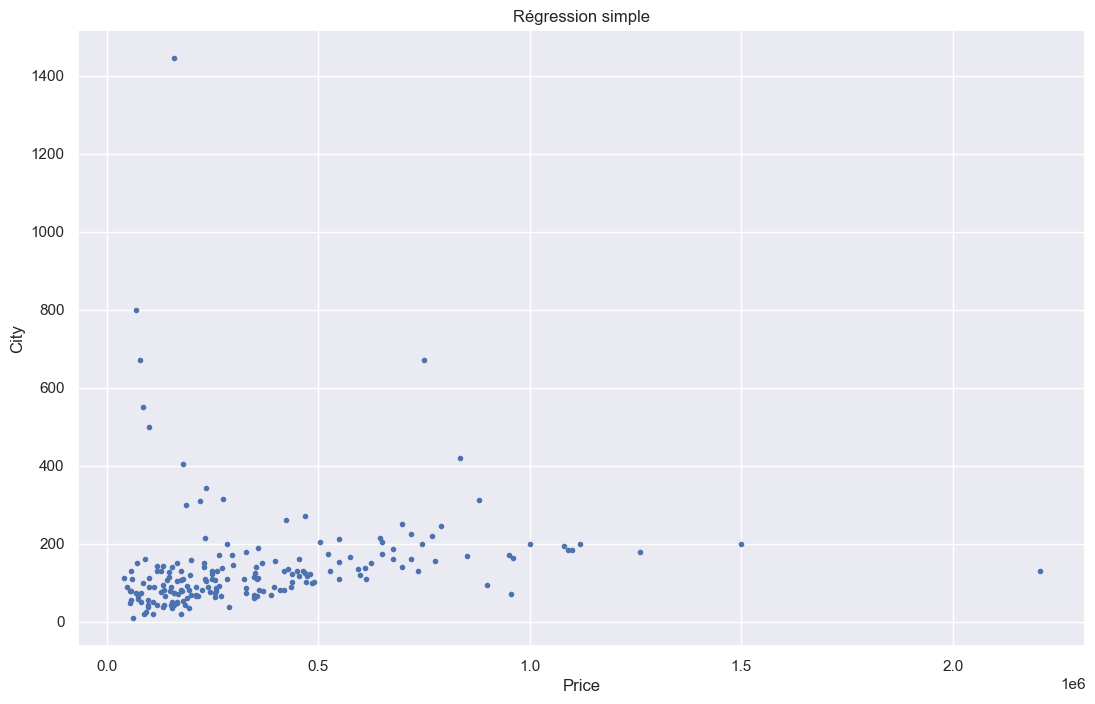

In [186]:
plt.figure()
plt.plot(X,Y, 'o', markersize=3)
plt.title('Régression simple')
plt.xlabel('Price')
plt.ylabel('City');

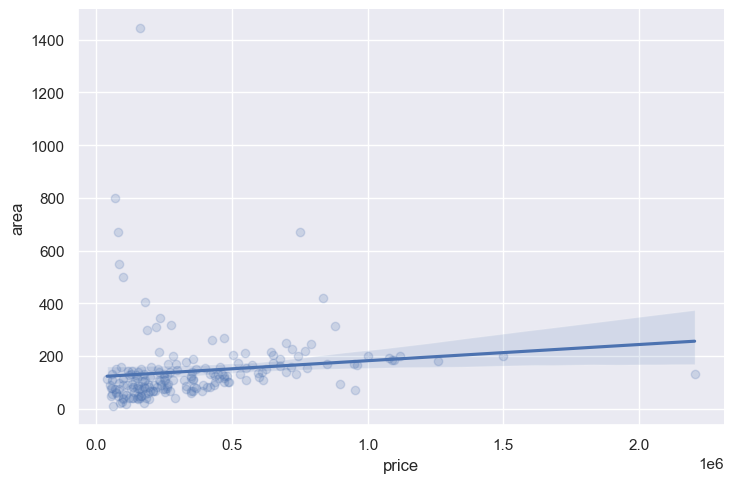

In [238]:
sns.lmplot(x='price', y='area', data=lin_reg_data, aspect=1.5, scatter_kws={'alpha':0.2});

### 1.2 Sklearn

In [239]:
from sklearn.linear_model import LinearRegression

X=lin_reg_data[['price']]
Y=lin_reg_data['area'].values
reg=LinearRegression()
modele=reg.fit(X,Y)

In [240]:
modele.coef_

array([6.14002811e-05])

In [241]:
modele.intercept_

120.76509330094957

L'équation est Prix du bien pour une zone : numero zone * 6.14002811e-05 + 120.76

In [242]:
modele.predict([[3]])

/Users/loic/mambaforge/envs/ml/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([120.7652775])

## 3. Régression polynomiale 

/var/folders/zr/djbtpkf1667dmnmzpm7kv8kr0000gn/T/ipykernel_42201/1924827957.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data, x="price", hue="city", kind="kde");


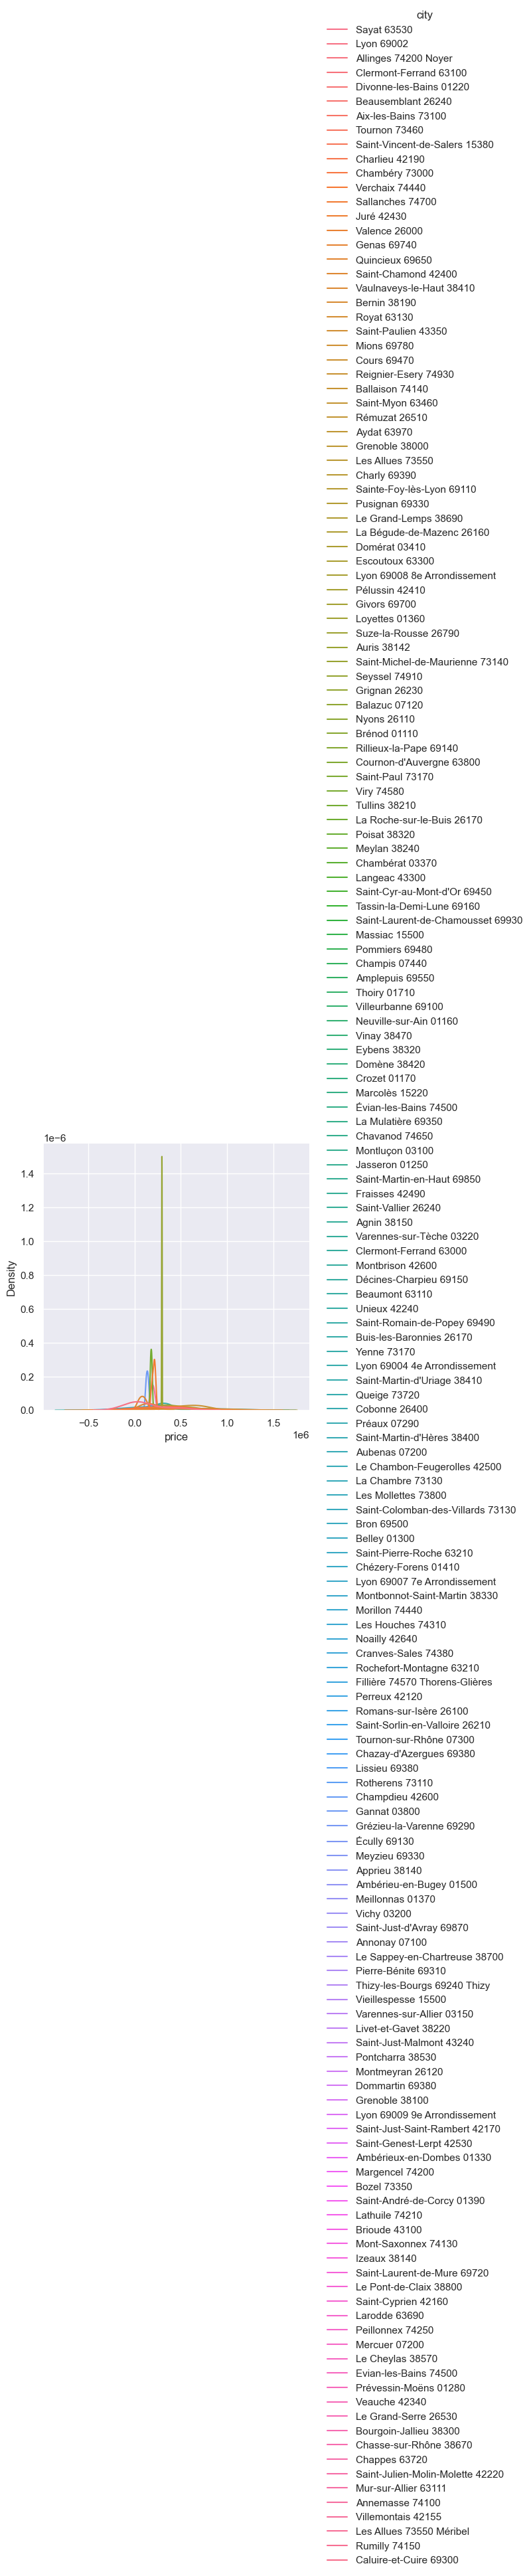

In [243]:
sns.displot(data, x="price", hue="city", kind="kde");

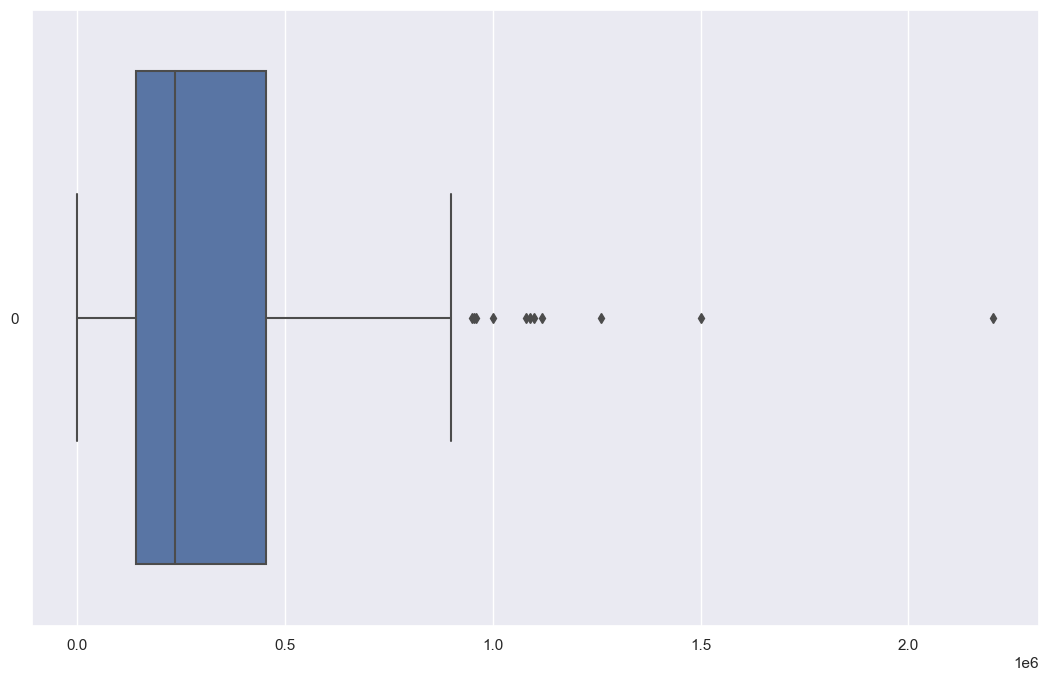

In [244]:
sns.boxplot(data['price'], orient='h');

In [248]:
correlation_matrix = lin_reg_data.corr(numeric_only=True).round(2)

correlation_matrix

,id,result_position,annonce_id,area,lat,lng,owner_type,owner_store_id,owner_siren,price,postal_code,room_count,input_max_pages
id,1.00,0.14,0.73,-0.06,0.11,-0.07,-0.15,0.06,-0.10,-0.09,0.05,-0.11,NaN
result_position,0.14,1.00,0.11,0.03,0.09,0.09,0.17,-0.03,0.07,-0.07,0.01,-0.12,NaN
annonce_id,0.73,0.11,1.00,-0.04,0.16,-0.06,-0.22,0.02,-0.01,0.08,0.12,-0.01,NaN
area,-0.06,0.03,-0.04,1.00,0.03,0.04,0.10,-0.05,0.02,0.13,-0.23,0.69,NaN
lat,0.11,0.09,0.16,0.03,1.00,-0.03,-0.12,-0.12,-0.08,0.05,0.21,-0.02,NaN
lng,-0.07,0.09,-0.06,0.04,-0.03,1.00,0.02,0.16,0.05,0.29,0.24,-0.06,NaN
owner_type,-0.15,0.17,-0.22,0.10,-0.12,0.02,1.00,-0.01,NaN,0.01,-0.06,0.13,NaN
owner_store_id,0.06,-0.03,0.02,-0.05,-0.12,0.16,-0.01,1.00,0.43,-0.04,0.04,-0.07,NaN
owner_siren,-0.10,0.07,-0.01,0.02,-0.08,0.05,NaN,0.43,1.00,0.04,0.01,0.07,NaN
price,-0.09,-0.07,0.08,0.13,0.05,0.29,0.01,-0.04,0.04,1.00,0.19,0.43,NaN


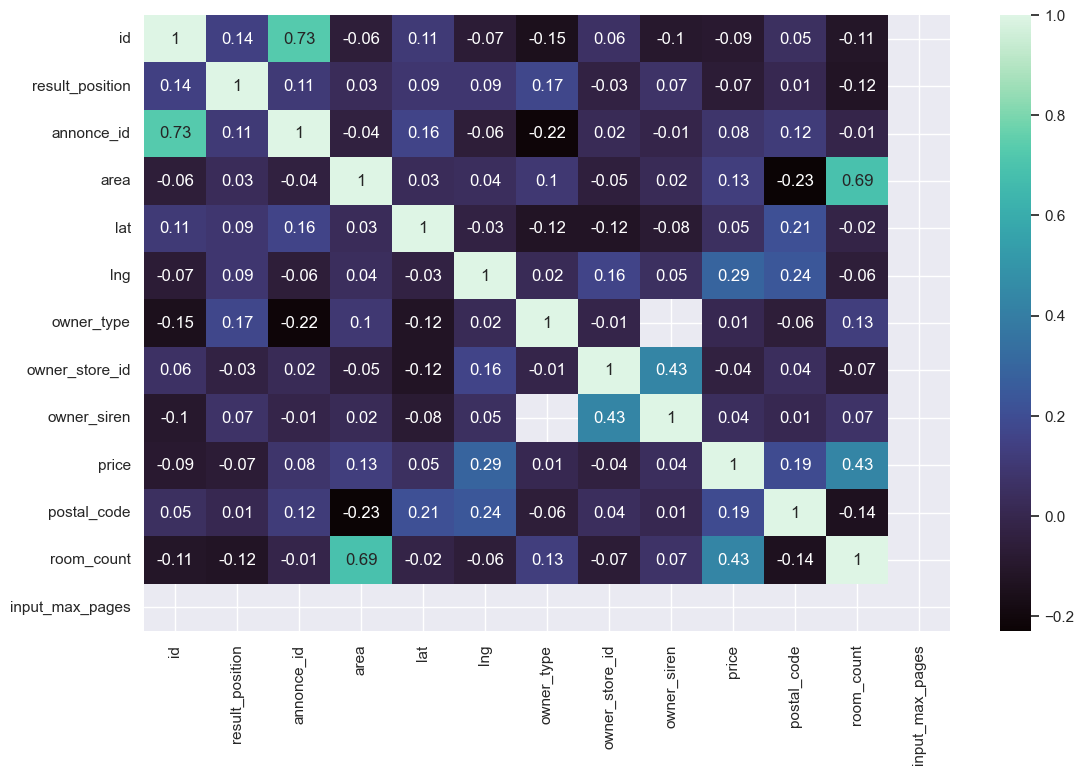

In [249]:
sns.set(rc={'figure.figsize':(13,8)})
sns.heatmap(data=correlation_matrix, annot=True, cmap='mako');